# Introduction
<hr style = "border:2px solid black" ></hr>


**What?** Vectorised Backtest of SMA - Simple Moving Average



# Vectorised vs. event-driven backtesting
<hr style = "border:2px solid black" ></hr>


- A **vectorised** backtest is the most basic way to evaluate a strategy. It simply multiplies a signal vector that represents the target position size with a vector of returns for the investment horizon to compute the period performance (some used the term equity curve). Vectorised backtesters are for quick research ideas. vectorized backtesting with NumPy and pandas is generally convenient and efficient to implement due to the concise code, and it is fast to execute due to these packages being optimized for such operations.
- An **event-driven** backtester is a more well thought out simulation. By making use of an event driven backtester we can stop look ahead bias to a large extent by only feeding in the data as it becomes available. This also very closely matches how your trading will take place in real life via an execution system. We also have the advantage of building in transaction costs, liquidity constraints, and market impact. This is not something you can do with the vectorized method. (You could add transaction costs after the fact).
- There seems to be a bit of a confusion of what what vectorised really means: if behind the scenes, the said vectorised function is simply passing the elements through a loop, just like an event-driven backtester in that sense. Then, there's no correctness reason for preferring one approach over another.



# Imports
<hr style = "border:2px solid black" ></hr>

In [26]:
import yfinance as yf
from itertools import product
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from tqdm import tqdm

In [2]:
# Getting rid of the warning messages
import warnings
warnings.filterwarnings("ignore")

# Pandas future warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas

# Get the data
<hr style = "border:2px solid black" ></hr>

In [3]:
# pull historical data
def get_data(pair):

    NUM_DAYS = 10000    # The number of days of historical data to retrieve
    INTERVAL = '1d'
    symbol = str(pair)   # Symbol of the desired stock

    # define start & dates
    start = (datetime.date.today() - datetime.timedelta(NUM_DAYS))
    end = datetime.datetime.today()

    # pull data
    df = yf.download(symbol, start=start, end=end, interval=INTERVAL)
    return df

In [4]:
pair = "AUDUSD=X"
data = get_data(pair)

[*********************100%***********************]  1 of 1 completed


# SMA - Simple Moving Average
<hr style = "border:2px solid black" ></hr>

In [5]:
# No of day you want to consider
sma_short = 55
sma_long = 200

# Calculate SMA values
data["SMA_S"] = data.Close.rolling(sma_short).mean()
data["SMA_L"] = data.Close.rolling(sma_long).mean()


# Drop missing values
data = data.dropna()
data

,Open,High,Low,Close,Adj Close,Volume,SMA_S,SMA_L
Date,,,,,,,,
2007-02-19,0.787402,0.788706,0.784929,0.786287,0.786287,0,0.851805,0.783149
2007-02-20,0.786287,0.788022,0.785176,0.788022,0.788022,0,0.851829,0.783254
2007-02-21,0.788022,0.792079,0.786596,0.790889,0.790889,0,0.851943,0.783411
2007-02-22,0.791014,0.791703,0.787712,0.789391,0.789391,0,0.851958,0.783538
2007-02-23,0.789391,0.792581,0.788395,0.791891,0.791891,0,0.852051,0.783711
...,...,...,...,...,...,...,...,...
2023-07-05,0.669270,0.670100,0.665830,0.669270,0.669270,0,0.667689,0.669640
2023-07-06,0.665690,0.668900,0.660018,0.665690,0.665690,0,0.667601,0.669715
2023-07-07,0.662840,0.668717,0.662120,0.662840,0.662840,0,0.667392,0.669773


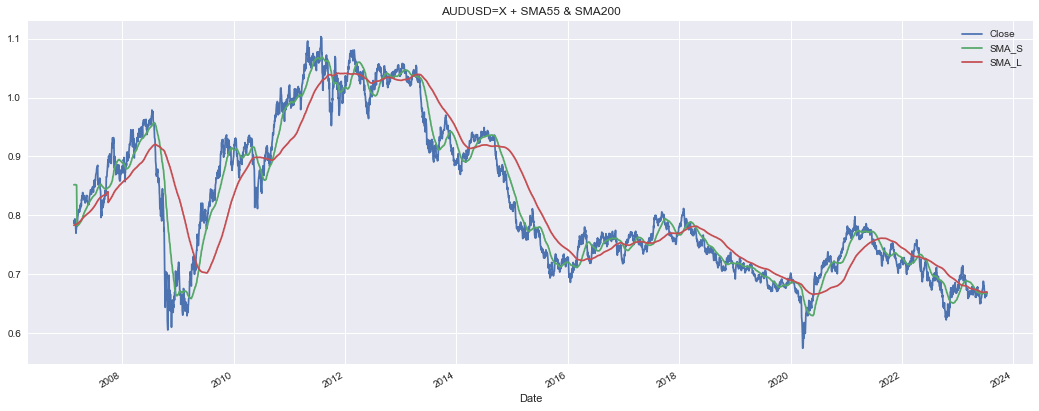

In [6]:
data.plot(figsize=(18, 7), y=["Close", "SMA_S", "SMA_L"],
          title=f"{pair} + SMA{sma_short} & SMA{sma_long}")
# plt.grid()
plt.show()

# SMA strategy logic
<hr style = "border:2px solid black" ></hr>


- Where short SMA is greater than the long SMA, the position is +1 (buy)
- Where short SMA is less than the long SMA, the position is -1 (sell).



In [7]:
# Define Positions (Long or Short). Where 1 = Buy, -1 = Sell
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
data

,Open,High,Low,Close,Adj Close,Volume,SMA_S,SMA_L,position
Date,,,,,,,,,
2007-02-19,0.787402,0.788706,0.784929,0.786287,0.786287,0,0.851805,0.783149,1
2007-02-20,0.786287,0.788022,0.785176,0.788022,0.788022,0,0.851829,0.783254,1
2007-02-21,0.788022,0.792079,0.786596,0.790889,0.790889,0,0.851943,0.783411,1
2007-02-22,0.791014,0.791703,0.787712,0.789391,0.789391,0,0.851958,0.783538,1
2007-02-23,0.789391,0.792581,0.788395,0.791891,0.791891,0,0.852051,0.783711,1
...,...,...,...,...,...,...,...,...,...
2023-07-05,0.669270,0.670100,0.665830,0.669270,0.669270,0,0.667689,0.669640,-1
2023-07-06,0.665690,0.668900,0.660018,0.665690,0.665690,0,0.667601,0.669715,-1
2023-07-07,0.662840,0.668717,0.662120,0.662840,0.662840,0,0.667392,0.669773,-1


# Define Buy & Hold Returns
<hr style = "border:2px solid black" ></hr>


- The daily log returns are calculated by taking the natural logarithm of the division of the present close price by the previous price.
- Log returns are an important financial metrics for determining the returns of an investment. 
- Strategy returns is the return from the position taken based on the previous close price. i.e the return for the present close price multiplied by the signal position — Buy(+1) or Sell(-1). The logic behind this is simple; if by the end of day 1, the signal says “Buy (+1)” and you take a long position, by day 2, the return of the strategy from the position taken from the signal on day 1 would be the log returns between the price of day 1 and day 2 multiplied by the position itself. E.g. If the position at day 1 is -1 and the log returns at day 2 is -0.00302, the strategy returns = -1 * -0.00302 i.e a profit return of 0.00302
    


In [8]:
data.Close/data.Close.shift(1)

Date
2007-02-19         NaN
2007-02-20    1.002206
2007-02-21    1.003638
2007-02-22    0.998105
2007-02-23    1.003168
                ...   
2023-07-05    1.002788
2023-07-06    0.994651
2023-07-07    0.995718
2023-07-10    1.009049
2023-07-11    0.999465
Name: Close, Length: 4265, dtype: float64

In [9]:
data.Close.div(data.Close.shift(1))

Date
2007-02-19         NaN
2007-02-20    1.002206
2007-02-21    1.003638
2007-02-22    0.998105
2007-02-23    1.003168
                ...   
2023-07-05    1.002788
2023-07-06    0.994651
2023-07-07    0.995718
2023-07-10    1.009049
2023-07-11    0.999465
Name: Close, Length: 4265, dtype: float64

In [10]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))


# daily return of strategy
data["strategy"] = data.position.shift(1) * data["returns"]
data.dropna(inplace=True)

In [11]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,,,,,,
2007-02-20,0.786287,0.788022,0.785176,0.788022,0.788022,0,0.851829,0.783254,1,0.002204,0.002204
2007-02-21,0.788022,0.792079,0.786596,0.790889,0.790889,0,0.851943,0.783411,1,0.003632,0.003632
2007-02-22,0.791014,0.791703,0.787712,0.789391,0.789391,0,0.851958,0.783538,1,-0.001896,-0.001896
2007-02-23,0.789391,0.792581,0.788395,0.791891,0.791891,0,0.852051,0.783711,1,0.003163,0.003163
2007-02-26,0.792393,0.794407,0.791390,0.794029,0.794029,0,0.852204,0.783915,1,0.002696,0.002696


# Calculate Absolute Performance
<hr style = "border:2px solid black" ></hr>


- **Absolute performance** — the sum of the log returns of buy & hold and strategy. This gives an overview of the absolute returns after the test period.
- **Annual returns** — The mean of the log returns of buy & hold and strategy multiplied by the total number of trading days in a year (252).
- **Annual risk** — The standard deviation of the log returns of buy & hold and strategy multiplied by the square root of total number of trading days in a year (252).
- **Cumulative Returns** — is calculated by the cumulative sum of exponential of the strategy log returns and the buy & hold returns



In [12]:
# calculate absolute performance
data[["returns", "strategy"]].sum()

returns    -0.162315
strategy   -0.312719
dtype: float64

In [13]:
# CALCULATE ACTUAL VALUE OF ABSOLUTE PERFORMANCE
data[["returns", "strategy"]].sum().apply(np.exp)

returns     0.850174
strategy    0.731455
dtype: float64

In [14]:
# annual return
data[["returns", "strategy"]].mean() * 252

returns    -0.009593
strategy   -0.018482
dtype: float64

In [15]:
# annual risk
data[["returns", "strategy"]].std() * np.sqrt(252)

returns     0.129587
strategy    0.129583
dtype: float64

In [16]:
data["cum_returns"] = data["returns"].cumsum().apply(np.exp)
data["cum_strategy"] = data["strategy"].cumsum().apply(np.exp)
data

,Open,High,Low,Close,Adj Close,Volume,SMA_S,SMA_L,position,returns,strategy,cum_returns,cum_strategy
Date,,,,,,,,,,,,,
2007-02-20,0.786287,0.788022,0.785176,0.788022,0.788022,0,0.851829,0.783254,1,0.002204,0.002204,1.002206,1.002206
2007-02-21,0.788022,0.792079,0.786596,0.790889,0.790889,0,0.851943,0.783411,1,0.003632,0.003632,1.005853,1.005853
2007-02-22,0.791014,0.791703,0.787712,0.789391,0.789391,0,0.851958,0.783538,1,-0.001896,-0.001896,1.003947,1.003947
2007-02-23,0.789391,0.792581,0.788395,0.791891,0.791891,0,0.852051,0.783711,1,0.003163,0.003163,1.007127,1.007127
2007-02-26,0.792393,0.794407,0.791390,0.794029,0.794029,0,0.852204,0.783915,1,0.002696,0.002696,1.009846,1.009846
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-05,0.669270,0.670100,0.665830,0.669270,0.669270,0,0.667689,0.669640,-1,0.002784,-0.002784,0.851178,0.730592
2023-07-06,0.665690,0.668900,0.660018,0.665690,0.665690,0,0.667601,0.669715,-1,-0.005363,0.005363,0.846625,0.734521
2023-07-07,0.662840,0.668717,0.662120,0.662840,0.662840,0,0.667392,0.669773,-1,-0.004291,0.004291,0.843000,0.737680


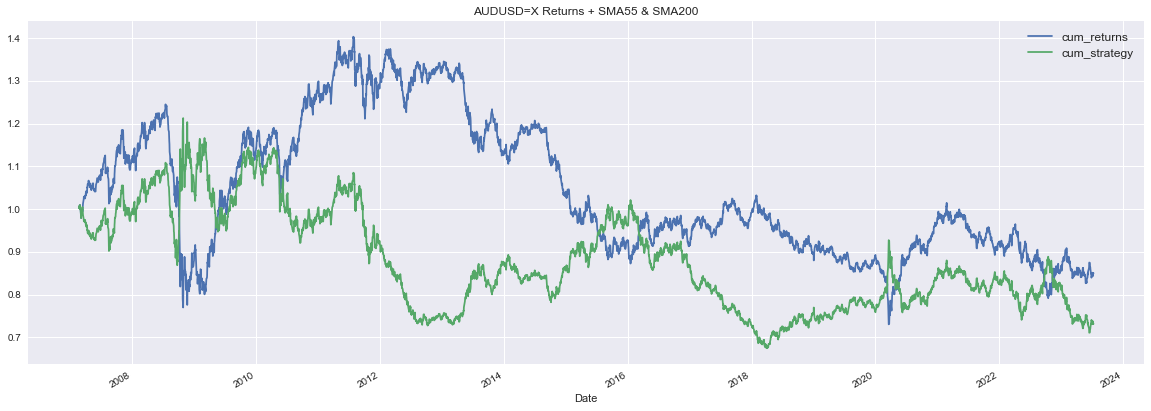

In [17]:
# Visualize Cummulative returns
data[["cum_returns", "cum_strategy"]].plot(
    figsize=(20, 7), title=f"{pair} Returns + SMA{sma_short} & SMA{sma_long}")
plt.legend(fontsize=12)
plt.show()


- This shows the strategy using a SMA(sma_short = 55, sma_long = 200) performed worse than a buy & hold investment and would not be profitable to trade.
- The strategy performance can be calculated by subtracting the last cumulative returns of buy & hold from the last cumulative return of the strategy. T0his shows a -11.0% performance compared to buy & hold



In [18]:
strat_perf = data.cum_strategy.iloc[-1] - data.cum_returns.iloc[-1]
round(strat_perf, 5)*100

-11.872

# Optimise SMA combination
<hr style = "border:2px solid black" ></hr>

In [20]:
# Create Backtest function
def sma_backtest(data, sma_short, sma_long):
    df = data.copy()
    df["returns"] = np.log(df.Close.div(df.Close.shift(1)))
    df["SMA_S"] = data.Close.rolling(sma_short).mean()
    df["SMA_L"] = data.Close.rolling(sma_long).mean()
    df.dropna(inplace=True)

    df["position"] = np.where(df["SMA_S"] > df["SMA_L"], 1, -1)
    df["strategy"] = df.position.shift(1) * df["returns"]
    df.dropna(inplace=True)

    # returns the absolute performance of strateg
    return round(np.exp(df["strategy"].sum()), 5)

In [21]:
# range of sma
range_sma_short = range(3, 50, 1)
range_sma_long = range(55, 250, 1)

In [22]:
# combination of SMAs
smas = list(product(range_sma_short, range_sma_long))
smas

[(3, 55),
 (3, 56),
 (3, 57),
 (3, 58),
 (3, 59),
 (3, 60),
 (3, 61),
 (3, 62),
 (3, 63),
 (3, 64),
 (3, 65),
 (3, 66),
 (3, 67),
 (3, 68),
 (3, 69),
 (3, 70),
 (3, 71),
 (3, 72),
 (3, 73),
 (3, 74),
 (3, 75),
 (3, 76),
 (3, 77),
 (3, 78),
 (3, 79),
 (3, 80),
 (3, 81),
 (3, 82),
 (3, 83),
 (3, 84),
 (3, 85),
 (3, 86),
 (3, 87),
 (3, 88),
 (3, 89),
 (3, 90),
 (3, 91),
 (3, 92),
 (3, 93),
 (3, 94),
 (3, 95),
 (3, 96),
 (3, 97),
 (3, 98),
 (3, 99),
 (3, 100),
 (3, 101),
 (3, 102),
 (3, 103),
 (3, 104),
 (3, 105),
 (3, 106),
 (3, 107),
 (3, 108),
 (3, 109),
 (3, 110),
 (3, 111),
 (3, 112),
 (3, 113),
 (3, 114),
 (3, 115),
 (3, 116),
 (3, 117),
 (3, 118),
 (3, 119),
 (3, 120),
 (3, 121),
 (3, 122),
 (3, 123),
 (3, 124),
 (3, 125),
 (3, 126),
 (3, 127),
 (3, 128),
 (3, 129),
 (3, 130),
 (3, 131),
 (3, 132),
 (3, 133),
 (3, 134),
 (3, 135),
 (3, 136),
 (3, 137),
 (3, 138),
 (3, 139),
 (3, 140),
 (3, 141),
 (3, 142),
 (3, 143),
 (3, 144),
 (3, 145),
 (3, 146),
 (3, 147),
 (3, 148),
 (3, 149),


In [23]:
len(smas)

9165

In [27]:
# iterate through sma combination and test strategy
abs_perform = []
for pro in tqdm(smas):
    abs_perform.append(sma_backtest(data, pro[0], pro[1]))

100%|█████████████████████████████████████████████████████████████████████████████| 9165/9165 [00:29<00:00, 313.64it/s]


In [28]:
# Get max value
np.max(abs_perform)

2.07676

In [32]:
# results to dataframe
results = pd.DataFrame(smas, columns=["SMA_short", "SMA_long"])
results["abs_performance"] = abs_perform
results.sort_values("abs_performance", ascending=False)

,SMA_short,SMA_long,abs_performance
2044,13,149,2.07676
2238,14,148,2.05422
2043,13,148,2.04535
1849,12,149,2.04522
2045,13,150,2.04219
...,...,...,...
8780,48,60,0.56172
8783,48,63,0.55895
8781,48,61,0.54753
8588,47,63,0.54696


In [34]:
# Get max value combination
best_comb = smas[np.argmax(abs_perform)]
best_comb

(13, 149)

In [35]:
# top 10 best performing combination
best = results.nlargest(10, "abs_performance")
best.head()

,SMA_short,SMA_long,abs_performance
2044,13,149,2.07676
2238,14,148,2.05422
2043,13,148,2.04535
1849,12,149,2.04522
2045,13,150,2.04219


In [36]:
# top 10 least performing combination
least = results.nsmallest(10, "abs_performance")
least.head()

,SMA_short,SMA_long,abs_performance
8584,47,59,0.54416
8588,47,63,0.54696
8781,48,61,0.54753
8783,48,63,0.55895
8780,48,60,0.56172


# Check best performing combination
<hr style = "border:2px solid black" ></hr>

In [37]:
# define SMA values
sma_short = best_comb[0]
sma_long = best_comb[1]

# calculate SMA values
new_data = data.Close.to_frame()
new_data["SMA_s"] = data.Close.rolling(sma_short).mean()
new_data["SMA_l"] = data.Close.rolling(sma_long).mean()

# drop missing values
new_data = new_data.dropna()
new_data

,Close,SMA_s,SMA_l
Date,,,
2007-09-17,0.833611,0.828128,0.828731
2007-09-18,0.850412,0.830544,0.829149
2007-09-19,0.855871,0.833540,0.829586
2007-09-20,0.865426,0.837301,0.830096
2007-09-21,0.864977,0.840652,0.830586
...,...,...,...
2023-07-05,0.669270,0.671981,0.675863
2023-07-06,0.665690,0.670295,0.675783
2023-07-07,0.662840,0.668580,0.675680


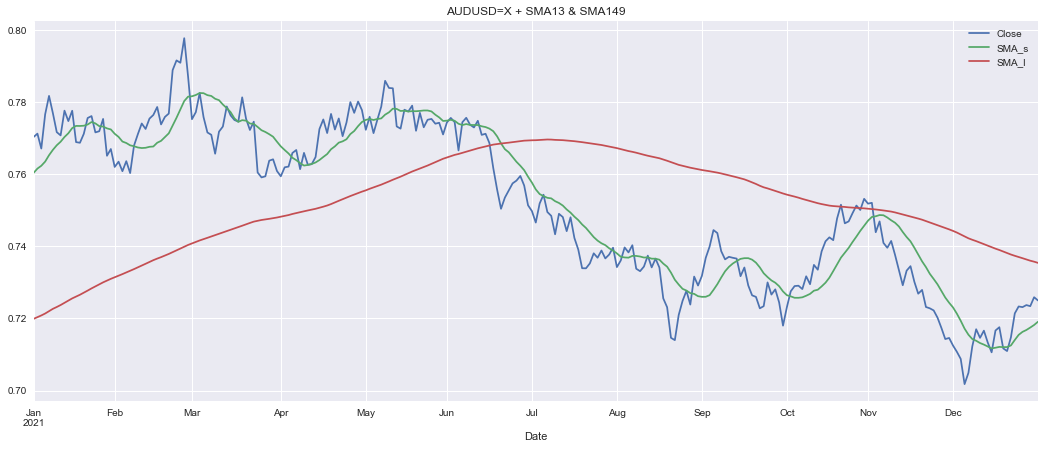

In [38]:
new_data["2021"].plot(
    figsize=(18, 7), title=f"{pair} + SMA{sma_short} & SMA{sma_long}")
plt.show()

In [39]:
# Define Positions (Long or Short). Where 1 = Buy, -1 = Sell
new_data["position"] = np.where(new_data["SMA_s"] > new_data["SMA_l"], 1, -1)
new_data

,Close,SMA_s,SMA_l,position
Date,,,,
2007-09-17,0.833611,0.828128,0.828731,-1
2007-09-18,0.850412,0.830544,0.829149,1
2007-09-19,0.855871,0.833540,0.829586,1
2007-09-20,0.865426,0.837301,0.830096,1
2007-09-21,0.864977,0.840652,0.830586,1
...,...,...,...,...
2023-07-05,0.669270,0.671981,0.675863,-1
2023-07-06,0.665690,0.670295,0.675783,-1
2023-07-07,0.662840,0.668580,0.675680,-1


In [40]:
new_data["returns"] = np.log(new_data.Close.div(new_data.Close.shift(1)))


# daily return of strategy
new_data["strategy"] = new_data.position.shift(1) * new_data["returns"]
new_data.dropna(inplace=True)
new_data

,Close,SMA_s,SMA_l,position,returns,strategy
Date,,,,,,
2007-09-18,0.850412,0.830544,0.829149,1,0.019954,-0.019954
2007-09-19,0.855871,0.833540,0.829586,1,0.006398,0.006398
2007-09-20,0.865426,0.837301,0.830096,1,0.011102,0.011102
2007-09-21,0.864977,0.840652,0.830586,1,-0.000519,-0.000519
2007-09-24,0.867227,0.843831,0.831078,1,0.002598,0.002598
...,...,...,...,...,...,...
2023-07-05,0.669270,0.671981,0.675863,-1,0.002784,-0.002784
2023-07-06,0.665690,0.670295,0.675783,-1,-0.005363,0.005363
2023-07-07,0.662840,0.668580,0.675680,-1,-0.004291,0.004291


In [41]:
# calculate absolute performance
new_data[["returns", "strategy"]].sum()

returns    -0.22076
strategy    0.73081
dtype: float64

In [42]:
# CALCULATE ACTUAL VALUE OF ABSOLUTE PERFORMANCE
new_data[["returns", "strategy"]].sum().apply(np.exp)

returns     0.801909
strategy    2.076762
dtype: float64

In [43]:
# annual return
new_data[["returns", "strategy"]].mean() * 252

returns    -0.013519
strategy    0.044754
dtype: float64

In [44]:
# annual risk
new_data[["returns", "strategy"]].std() * np.sqrt(252)

returns     0.130321
strategy    0.130293
dtype: float64

In [45]:
new_data["cum_returns"] = new_data["returns"].cumsum().apply(np.exp)
new_data["cum_strategy"] = new_data["strategy"].cumsum().apply(np.exp)
new_data

,Close,SMA_s,SMA_l,position,returns,strategy,cum_returns,cum_strategy
Date,,,,,,,,
2007-09-18,0.850412,0.830544,0.829149,1,0.019954,-0.019954,1.020155,0.980243
2007-09-19,0.855871,0.833540,0.829586,1,0.006398,0.006398,1.026703,0.986536
2007-09-20,0.865426,0.837301,0.830096,1,0.011102,0.011102,1.038165,0.997549
2007-09-21,0.864977,0.840652,0.830586,1,-0.000519,-0.000519,1.037626,0.997031
2007-09-24,0.867227,0.843831,0.831078,1,0.002598,0.002598,1.040326,0.999625
...,...,...,...,...,...,...,...,...
2023-07-05,0.669270,0.671981,0.675863,-1,0.002784,-0.002784,0.802856,2.074312
2023-07-06,0.665690,0.670295,0.675783,-1,-0.005363,0.005363,0.798562,2.085467
2023-07-07,0.662840,0.668580,0.675680,-1,-0.004291,0.004291,0.795143,2.094435


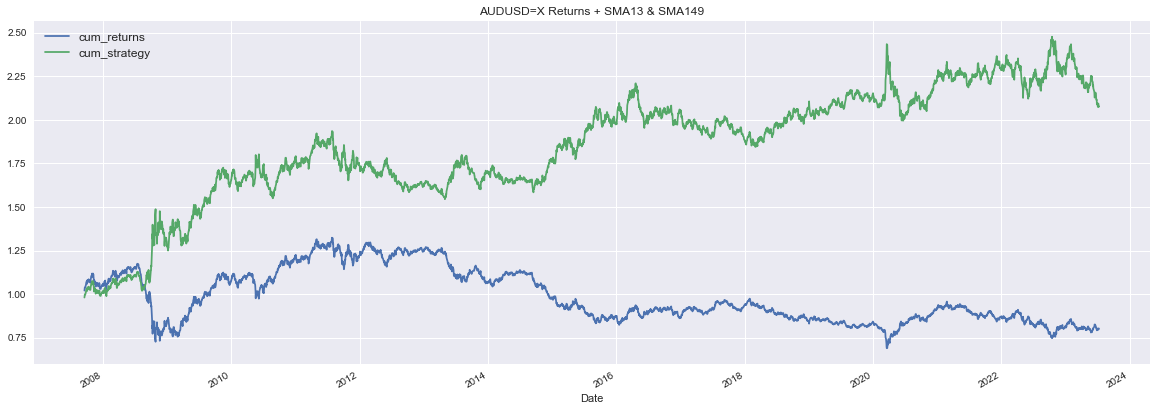

In [46]:
# Visualize Cummulative returns
new_data[["cum_returns", "cum_strategy"]].plot(
    figsize=(20, 7), title=f"{pair} Returns + SMA{sma_short} & SMA{sma_long}")
plt.legend(fontsize=12)
plt.show()

# References
<hr style = "border:2px solid black" ></hr>


- [YAHOO AUD/USD](https://finance.yahoo.com/quote/AUDUSD=X/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvLnVrLw&guce_referrer_sig=AQAAALNbKvdnnyycC3agGxv2fNzx__G73WarjVfBU63B7R9XGoqbvxhA3w9GcR3L9FLa8dLwc66QMCF26cabsJGtchOasiKqmt8cQaoNpVmRM6nZyYSu0yh96F93qHmzud_O1HgswybhoZM4CTiX9kybecUul4nmAlvBODyHEXBmyJ5t)
- [Blog article](https://wire.insiderfinance.io/vectorized-backtest-of-sma-cross-strategy-991cb13ffcd0)
- [Why do we need event-driven backtesters?](https://quant.stackexchange.com/questions/46791/why-do-we-need-event-driven-backtesters)
- [Why log return?](https://quantivity.wordpress.com/2011/02/21/why-log-returns/)
    
